In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [6]:
digits.data.shape

(1797, 64)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

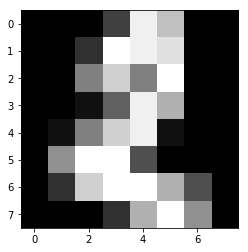

In [10]:
plt.imshow(digits.data[2].reshape(8,8), cmap='gray')

In [11]:
digits.target[2]

2

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [13]:
trainX,testX, trainY,testY = train_test_split(digits.data, digits.target)

In [15]:
class HandWringClsf(object):
    def __init__(self,clsf_list):
        self.clsf = clsf_list
        self.pipelines = []
        
    def create_pipelines(self,transformers,selectors):
        for est in self.clsf:
            pipeline = Pipeline([('trsf',transformers),('select',selectors),('est',est)])
            self.pipelines.append(pipeline)
            
    def fit(self,trainX,trainY):
        for pipeline in self.pipelines:
            pipeline.fit(trainX,trainY)
            
    def score(self,testX,testY):
        for pipeline in self.pipelines:
            print(pipeline.score(testX,testY))

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [17]:
clf_list = [RandomForestClassifier(), AdaBoostClassifier(), KNeighborsClassifier(), SVC()]

In [18]:
hwc = HandWringClsf(clf_list)

In [19]:
from sklearn.preprocessing import MinMaxScaler
hwc.create_pipelines(MinMaxScaler(feature_range=[0,1]), PCA(n_components=32))

In [20]:
hwc.fit(trainX,trainY)

In [21]:
hwc.score(testX,testY)

0.9244444444444444
0.3
0.9777777777777777
0.9666666666666667
